In [279]:
!ls
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format
import re
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline 

Complete_CLEAN_IMDB_Data.csv
DataExplorationCont.ipynb
DataInvestigation_Alex.ipynb
InitialDataExploration.ipynb
JenniferVisualizations.ipynb
Movie-Data-Project1.ipynb
Neptune-Jennifer Cleaning.ipynb
Neptune-JenniferCleaningComplete.ipynb
Neptune.ipynb
README.md
VisualizationsJennifer.ipynb
imdb_title_basics.csv
zippedData


In [8]:
movie_df = pd.read_csv('Complete_CLEAN_IMDB_Data.csv')



In [12]:
#Cast columns as strings
df1 = movie_df[[str('genres'), str('Movie'), str('Profit'), str('ROI'), str('Year_y'), str('Studio')]].copy()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genres  1163 non-null   object 
 1   Movie   1163 non-null   object 
 2   Profit  1163 non-null   int64  
 3   ROI     1163 non-null   float64
 4   Year_y  1163 non-null   int64  
 5   Studio  1163 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.6+ KB


In [21]:
#Used to ensure that each genre is being represented acurately

new_movie_df = (df1.set_index(['Movie', 'Profit', 'ROI', 'Year_y', 'Studio'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())

In [22]:
new_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Movie   3041 non-null   object 
 1   Profit  3041 non-null   int64  
 2   ROI     3041 non-null   float64
 3   Year_y  3041 non-null   int64  
 4   Studio  3041 non-null   object 
 5   genres  3041 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 142.7+ KB


In [295]:

new_movie_df.groupby(['Studio']).sum()

,Profit,ROI,Year_y
Studio,,,
3D,11515203,3.30304,2010
A24,504106097,221.76806,76590
ATO,-30683442,0.54532,6030
Affirm,65530488,18.28870,8071
Alc,-29516709,0.04833,6045
...,...,...,...
W/Dim.,368465290,51.42823,20114
WB,45024361746,995.10116,614272
WB (NL),17047315464,1877.78544,197401


In [288]:
new_movie_df.groupby(['genres']).sum()

,Profit,ROI,Year_y
genres,,,
Action,63390360518,1070.99342,737093
Adventure,77144915185,978.67446,596158
Animation,27593006499,359.43372,181259
Biography,7121370424,424.91615,225644
Comedy,47249590552,1524.87624,871855
Crime,10410540068,484.72313,378584
Documentary,664585603,73.53862,26162
Drama,31706183178,2120.16292,1139785
Family,7944091594,191.24973,142921


In [201]:
#Lists created to streamline visualizations. Top ten studios found using worldwide_gross. 
#Bottom five genres and Top five genres found using ROI

top_ten_studios = ['BV', 'Fox', 'Uni.', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'P/DW', 'LG/S']
top_five_genre = ['Action', 'Adventure', 'Comedy', 'Drama', 'Thriller']
bottom_five_genre = ['Documentary', 'Musical', 'Sport', 'War', 'Western']

In [283]:

movies_top = new_movie_df[new_movie_df['Studio'].isin(top_ten_studios)]

In [203]:
movies_top_five_genre = movies_top[movies_top['genres'].isin(top_five_genre)]

In [216]:
movies_bottom_five_genre = movies_top[movies_top['genres'].isin(bottom_five_genre)]

In [209]:
movies_top_five_genre

,Movie,Profit,ROI,Year_y,Studio,genres
0,the secret life of walter mitty,96861183,2.06441,2013,Fox,Adventure
1,the secret life of walter mitty,96861183,2.06441,2013,Fox,Comedy
2,the secret life of walter mitty,96861183,2.06441,2013,Fox,Drama
3,a walk among the tombstones,34108587,2.21816,2014,Uni.,Action
5,a walk among the tombstones,34108587,2.21816,2014,Uni.,Drama
...,...,...,...,...,...,...
3029,teen titans go to the movies,41620593,5.16206,2018,WB,Comedy
3032,superfly,4723581,1.29522,2018,Sony,Action
3034,superfly,4723581,1.29522,2018,Sony,Thriller
3039,the mule,120857676,3.41715,2018,WB,Drama


In [217]:
movies_bottom_five_genre

,Movie,Profit,ROI,Year_y,Studio,genres
165,the book thief,57086711,4.00456,2013,Fox,War
265,the fighter,118262388,11.75113,2010,Par.,Sport
399,jackass 3d,151685793,8.58429,2010,Par.,Documentary
501,moneyball,61300835,2.22602,2011,Sony,Sport
504,the lone ranger,-14997885,0.94546,2013,BV,Western
611,300 rise of an empire,220780051,3.00709,2014,WB,War
664,warrior,-784615,0.96862,2011,LGF,Sport
747,rock of ages,-8968068,0.87188,2012,WB (NL),Musical
858,true grit,217276928,7.20791,2010,Par.,Western
1017,the greatest showman,302665550,4.60316,2017,Fox,Musical


In [200]:
#Pivot table created grouping the genres used by studio
studio_genre = pd.pivot_table(movies_top, values='Profit', index=['Studio'],
                    columns=['genres'], aggfunc='count', fill_value=0)

In [210]:
#Pivot table created grouping top five genres by studio
studio_top_five_genre =  pd.pivot_table(movies_top_five_genre, values='Profit', index=['Studio'],
                    columns=['genres'], aggfunc='count', fill_value=0)

In [220]:
#Pivot table created grouping top five genres by studio
studio_bottom_five_genre = pd.pivot_table(movies_bottom_five_genre, values='Profit', index=['Studio'],
                    columns=['genres'], aggfunc='count', fill_value=0)

In [211]:
studio_top_five_genre

genres,Action,Adventure,Comedy,Drama,Thriller
Studio,,,,,
BV,26,48,35,21,3
Fox,40,48,50,38,16
LG/S,15,8,6,8,5
LGF,28,11,18,22,19
P/DW,6,7,5,1,0
Par.,24,24,27,30,10
Sony,33,26,41,26,16
Uni.,44,29,55,42,27
WB,49,37,39,55,11


In [284]:
studio_bottom_five_genre

genres,Documentary,Musical,Sport,War,Western
Studio,,,,,
BV,0,0,3,1,1
Fox,1,1,1,1,0
LG/S,1,0,2,0,0
LGF,0,0,1,0,1
Par.,3,0,1,0,1
Sony,0,0,3,1,1
Uni.,2,0,1,1,1
WB,0,0,2,1,0
WB (NL),0,1,1,0,0


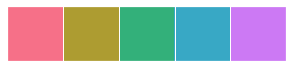

In [214]:
sequential_colors = sns.color_palette("husl", 5)
sns.palplot(sequential_colors)

In this graph, we see where the top 10 studios are investing their energy. 

Text(0.5, 0, '# of Genres')

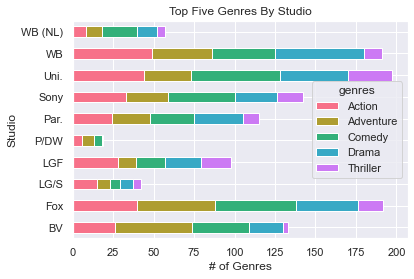

In [285]:
ax = studio_top_five_genre.plot.barh(stacked=True, color = sequential_colors)
sns.set_theme()
ax.set_title('Top Five Genres By Studio')
ax.set_xlabel('# of Genres')

Text(0.5, 0, '# of Genres')

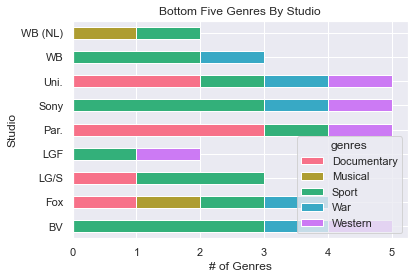

In [286]:
ax = studio_bottom_five_genre.plot.barh(stacked=True, color = sequential_colors)
sns.set_theme()
ax.set_title('Bottom Five Genres By Studio')
ax.set_xlabel('# of Genres')

Text(0.5, 0, '# of Genres')

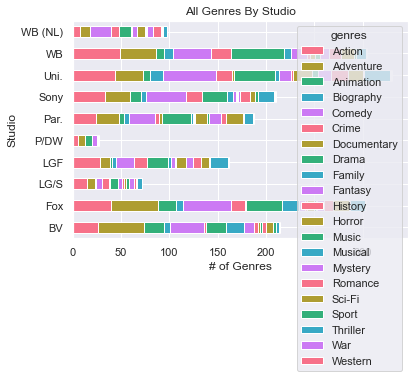

In [281]:
sg = studio_genre.plot.barh(stacked=True, color = sequential_colors)
sns.set_theme()
sg.set_title('All Genres By Studio')
sg.set_xlabel('# of Genres')
